In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start= '2013-01-01'
end= '2023-01-01'
stock='GOOG'
data=yf.download(stock,start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600


In [6]:
data.reset_index(inplace=True)


In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2513,2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2514,2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2515,2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600
2516,2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700


In [8]:
ma_100_days= data.Close.rolling(100).mean()

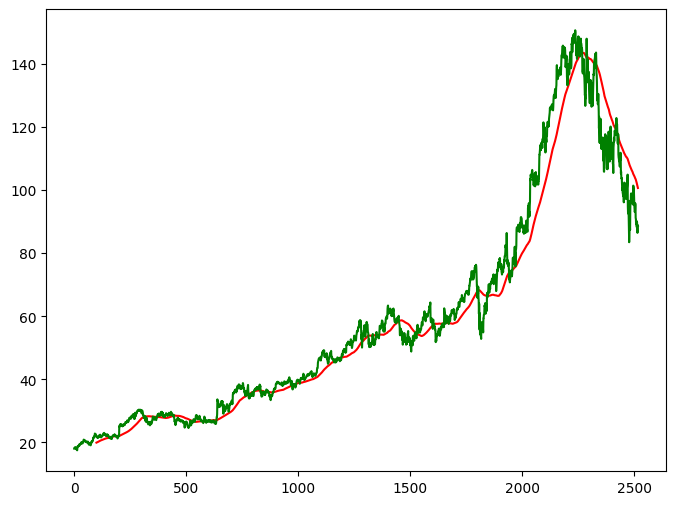

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close,'g')
plt.show()

In [10]:
ma_200_days= data.Close.rolling(200).mean()

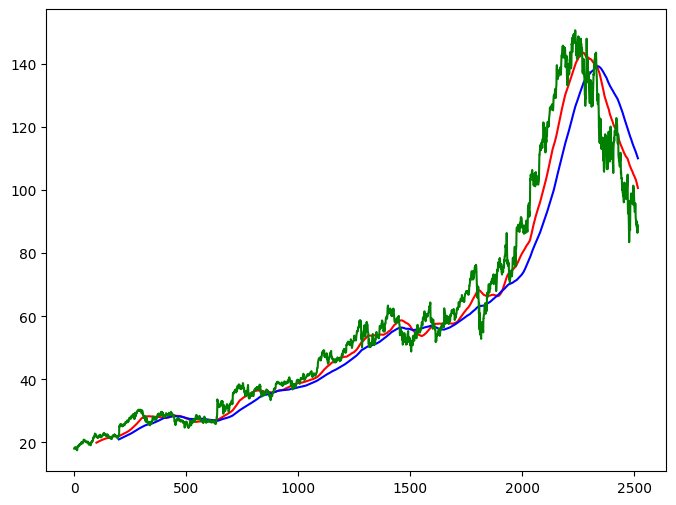

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
data.dropna(inplace=True)

In [13]:
data_train= pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape[0]

2014

In [15]:
data_test.shape[0]

504

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x=[]
y=[]

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100: i])
    y.append(data_train_scale[i,0])

In [19]:
x,y= np.array(x), np.array(y)

In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model= Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation ='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation= 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\Shubhankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0776
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0079
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0074
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0070
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0050
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0044
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0050
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0042
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0051
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0042
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0040
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0038
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0034
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0042
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0036
Epo

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [26]:
pas_100_days= data_train.tail(100)

In [27]:
data_test= pd.concat([pas_100_days, data_test], ignore_index= True)

In [28]:
data_test

,Close
0,74.805000
1,74.015999
2,75.331001
3,75.922501
4,75.386497
...,...
599,89.809998
600,87.930000
601,86.459999
602,88.949997


In [29]:
data_test_scale = scaler.fit_transform(data_test)

In [30]:
x=[]
y=[]

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100: i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [31]:
y_predict= model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


In [32]:
y_predict

array([[0.24307945],
       [0.24058244],
       [0.23833396],
       [0.23628527],
       [0.23439476],
       [0.23281747],
       [0.23178941],
       [0.23140799],
       [0.23162419],
       [0.23232982],
       [0.23334627],
       [0.23446715],
       [0.23565666],
       [0.23719107],
       [0.23938872],
       [0.24250886],
       [0.24677409],
       [0.25217375],
       [0.2582408 ],
       [0.26464602],
       [0.27077746],
       [0.2762168 ],
       [0.28098658],
       [0.28553206],
       [0.29042953],
       [0.29638132],
       [0.30386782],
       [0.31326887],
       [0.32408276],
       [0.33594096],
       [0.34805322],
       [0.35990345],
       [0.37127838],
       [0.38198996],
       [0.39178783],
       [0.40030262],
       [0.4072946 ],
       [0.41277742],
       [0.41665018],
       [0.4189394 ],
       [0.4199525 ],
       [0.42003423],
       [0.41938415],
       [0.41821206],
       [0.4168483 ],
       [0.41537586],
       [0.41387326],
       [0.412

In [33]:
scale=1/scaler.scale_

In [34]:
y_predict= y_predict*scale

In [35]:
y=y*scale

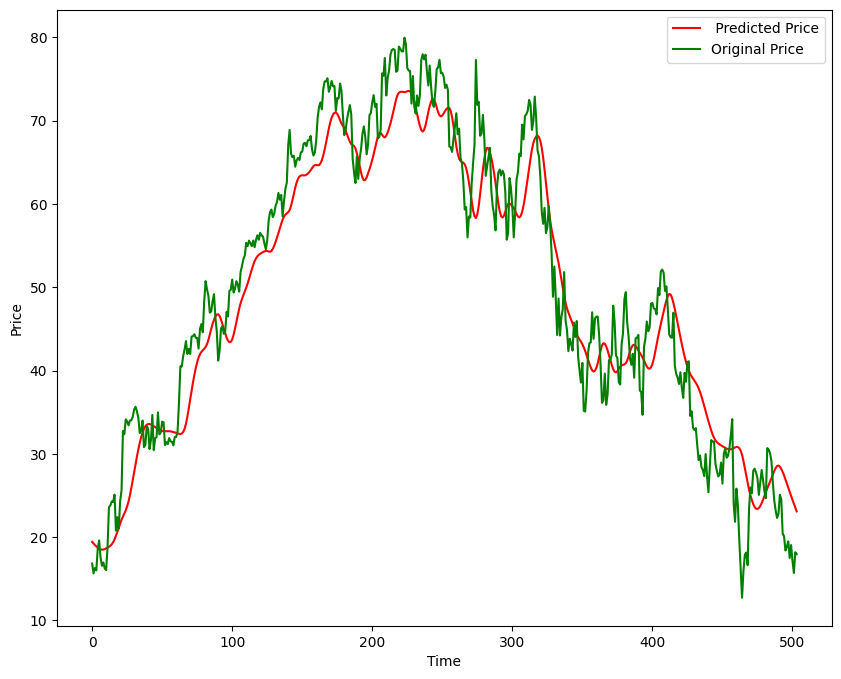

In [36]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label =' Predicted Price')
plt.plot(y,'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
model.save('Stock.keras')

In [39]:

model.save('LSTM_model.h5')
